In [1]:
# understand the business problem
# data understanding(data exploration, cleaning, missing values, ouliers)
# EDA
# Feature Engineering
# model training
# hyper parameter tuning
# model deployment 

## Questions to Answer

1. Why is your proposal important in today’s world? How predicting a disease accurately can improve medical treatment?  
   Forecasting COVID-19 cases is of utmost importance in proactively managing healthcare resources and mitigating the impact of the pandemic. As there had been millions of cases across the world recently, many countries were not ready for the huge inflow of covid-19 patients. This also affected the rate at which the patients were given an oppurtunity to be facilitated with the medical services. Hence predicting the number of cases in advance would lead to good use of resources and reducing mortality rates.

2. How is it going to impact the medical field when it comes to effective screening and reducing health care burden. 
    As discussed in the first question, almost every nation in the world suffered from inadequate resources and hospitals to treat the patients. Predicting cases in advance helps the government to take precautionary measures, like somewhere in China a new hospital was built within 48 hours to ensure more number of infected people were treated. Also, this becomes most advantageous when industries will be able to produce vaccines and medicines in advance. It aids in strategic planning for the required healthcare workforce.

3. If any, what is the gap in the knowledge or how your proposed method can be helpful if required in future for any other disease.
    Utilizing a similar approach, historical data on potential symptoms can be gathered to construct predictive models for early detection. This methodology extends the utility of the system to forecast different diseases, allowing medical departments to implement precautionary measures and adequately prepare resources for effective response and management.

# Initial Hypothesis

1. There exists a significant correlation between the 'Shortness_of_breath' feature and positive COVID-19 cases.
2. The Random Forest Model is anticipated to be the most suitable for accurate predictions in this context.

In [2]:
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
corona = pd.read_csv('corona_tested_006.csv')

C:\Users\Vipina m\AppData\Local\Temp\ipykernel_11216\4157283192.py:1: DtypeWarning: Columns (2,3,4,5,6,8) have mixed types. Specify dtype option on import or set low_memory=False.
  corona = pd.read_csv('corona_tested_006.csv')


In [23]:
corona.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,True,False,True,False,False,negative,NaN,NaN,Abroad
1,2,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
2,3,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
3,4,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Abroad
4,5,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Contact with confirmed


In [ ]:
corona.shape

In [27]:
corona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278596 non-null  object
 3   Fever                278596 non-null  object
 4   Sore_throat          278847 non-null  object
 5   Shortness_of_breath  278847 non-null  object
 6   Headache             278847 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         151528 non-null  object
 9   Sex                  259285 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


In [28]:
corona.isnull().sum()

Ind_ID                      0
Test_date                   0
Cough_symptoms            252
Fever                     252
Sore_throat                 1
Shortness_of_breath         1
Headache                    1
Corona                      0
Age_60_above           127320
Sex                     19563
Known_contact               0
dtype: int64

In [29]:
# check for duplicates
corona.duplicated().sum()

0

In [30]:
# Check for the unique values in each column and clean the data if necessary

for i in corona:
    print(i,':',corona[i].unique())

Ind_ID : [     1      2      3 ... 278846 278847 278848]
Test_date : ['2020-03-11' '2020-03-12' '2020-03-13' '2020-03-14' '2020-03-15'
 '2020-03-16' '2020-03-17' '2020-03-18' '2020-03-19' '2020-03-20'
 '2020-03-21' '2020-03-22' '2020-03-23' '2020-03-24' '2020-03-25'
 '2020-03-26' '2020-03-27' '2020-03-28' '2020-03-29' '2020-03-30'
 '2020-03-31' '2020-04-01' '2020-04-02' '2020-04-03' '2020-04-04'
 '2020-04-05' '2020-04-06' '2020-04-07' '2020-04-08' '2020-04-09'
 '2020-04-10' '2020-04-11' '2020-04-12' '2020-04-13' '2020-04-14'
 '2020-04-15' '2020-04-16' '2020-04-17' '2020-04-18' '2020-04-19'
 '2020-04-20' '2020-04-21' '2020-04-22' '2020-04-23' '2020-04-24'
 '2020-04-25' '2020-04-26' '2020-04-27' '2020-04-28' '2020-04-29'
 '2020-04-30']
Cough_symptoms : [True False nan]
Fever : [False True nan]
Sore_throat : [True False nan]
Shortness_of_breath : [False True nan]
Headache : [False True nan]
Corona : ['negative' 'positive' 'other']
Age_60_above : [nan 'No' 'Yes']
Sex : [nan 'male' 'female'

In [31]:
# Ind_ID is only the Identification numbers of the patients, they are of no use in building the ML model.
# Therefore set this column as index for the dataset

corona.set_index('Ind_ID', inplace=True)

In [32]:
corona.rename({'Sex':'Gender'}, axis = 1, inplace = True)

Given that the primary objective of this project is to predict whether a patient is likely to test "positive" for Covid-19 or not, the presence of a classification labeled as "Other" in the target variable is deemed non-contributory to the model's learning process. As such, to enhance the model's focus on the binary outcome of interest, I have chosen to exclude data points associated with the "Other" category from the dataset. This strategic decision ensures that the model's training is optimized for the specific predictive task at hand.

In [33]:
corona = corona[corona['Corona']!='other']
corona.shape

(274956, 10)

In [34]:
corona['Corona'].unique()

array(['negative', 'positive'], dtype=object)

Recognizing that the 'Test_date' alone might not significantly contribute to the model's learning, a new feature named 'Positive_Cases_of_the_Day' has been introduced in the dataset. This feature captures the total number of individuals who tested positive for COVID-19 on the day. This might potentially provide valuable insights for the model. Subsequently, the 'Test_date' column, which primarily served as a temporal identifier, is dropped from the dataset.

In [15]:
corona['Test_date'] = pd.to_datetime(corona['Test_date'], format= '%d-%m-%Y')

In [16]:
min_date = corona['Test_date'].min()
max_date = corona['Test_date'].max()

In [17]:
print(min_date)
print(max_date)

2020-03-11 00:00:00
2020-04-30 00:00:00


In [18]:
corona['Test_date'] = corona['Test_date'].dt.date

In [19]:
df = pd.DataFrame(corona.groupby(['Test_date'])['Corona'].transform(lambda x: (x=='positive').sum())).rename({'Corona': 'Positive_cases_of_the_day'},axis=1)
df

,Positive_cases_of_the_day
Ind_ID,
1,41
2,41
3,41
4,41
5,41
...,...
278844,153
278845,153
278846,153


In [20]:
corona = pd.concat([corona,df], axis=1)
corona

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Gender,Known_contact,Positive_cases_of_the_day
Ind_ID,,,,,,,,,,,
1,2020-03-11,True,False,True,False,False,negative,NaN,NaN,Abroad,41
2,2020-03-11,False,True,False,False,False,positive,NaN,NaN,Abroad,41
3,2020-03-11,False,True,False,False,False,positive,NaN,NaN,Abroad,41
4,2020-03-11,True,False,False,False,False,negative,NaN,NaN,Abroad,41
5,2020-03-11,True,False,False,False,False,negative,NaN,NaN,Contact with confirmed,41
...,...,...,...,...,...,...,...,...,...,...,...
278844,2020-04-30,False,False,False,False,False,positive,NaN,male,Other,153
278845,2020-04-30,False,False,False,False,False,negative,NaN,female,Other,153
278846,2020-04-30,False,False,False,False,False,negative,NaN,male,Other,153


In [21]:
corona.drop(columns = 'Test_date', inplace=True)

# Data Analysis

1 .What approach are you going to take in order to prove or disprove your hypothesis?
    To assess the correlation between "Sore_throat" and positive COVID-19 cases, a two-step analysis will be employed. Initially, a univariate analysis will be conducted to determine the percentage of individuals exhibiting a sore throat. Subsequently, a bivariate analysis will be executed to examine the percentage of individuals with a sore throat who tested positive for COVID-19. In addition, A machine learning model will be constructed to assess the comparative importance of the "Sore_throat" feature concerning the target variable (COVID-19 positive/negative). This analysis aims to quantify the contribution of the "Sore_throat" feature in predicting the target outcome and inform its significance within the predictive model.

2. What feature engineering techniques will be relevant to your project?
    For this project, treating missing values and encoding the data will be enough as all the columns
are categorical. There is no need for scaling or transformation as most of the features have binary
class. Given that the primary objective of this project is to predict whether a patient is likely to
test "positive" for Covid-19 or not, the presence of a classification labeled as "Other" in the target
variable is deemed non-contributory to the model's learning process. Hence all the data points with
other in target variables are removed.

## Uni-variate Analysis

In [22]:
cat_cols = corona.drop(columns='Positive_cases_of_the_day')

Categorical Features

In [23]:
cat_cols

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Gender,Known_contact
Ind_ID,,,,,,,,,
1,True,False,True,False,False,negative,NaN,NaN,Abroad
2,False,True,False,False,False,positive,NaN,NaN,Abroad
3,False,True,False,False,False,positive,NaN,NaN,Abroad
4,True,False,False,False,False,negative,NaN,NaN,Abroad
5,True,False,False,False,False,negative,NaN,NaN,Contact with confirmed
...,...,...,...,...,...,...,...,...,...
278844,False,False,False,False,False,positive,NaN,male,Other
278845,False,False,False,False,False,negative,NaN,female,Other
278846,False,False,False,False,False,negative,NaN,male,Other


In [24]:
num_cols = corona['Positive_cases_of_the_day']

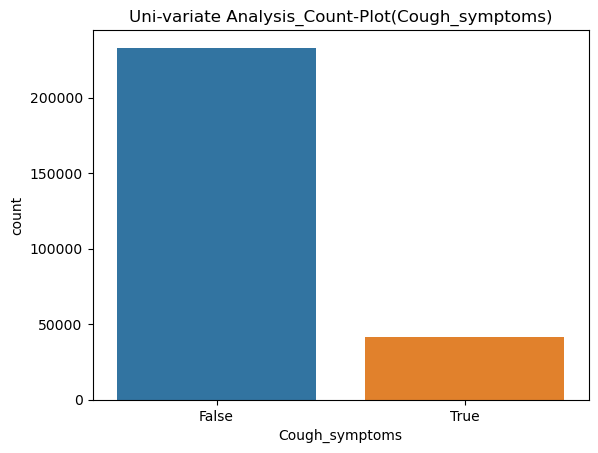

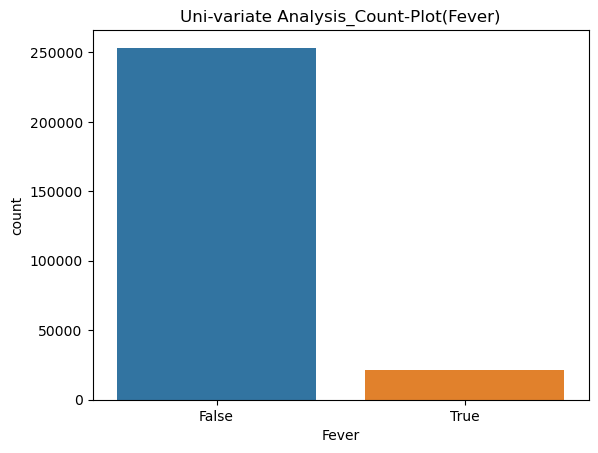

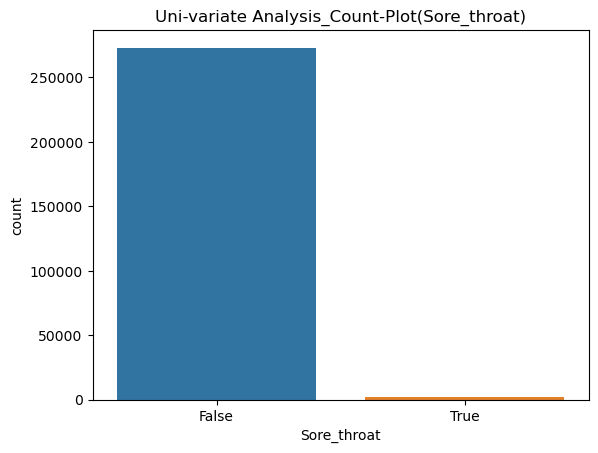

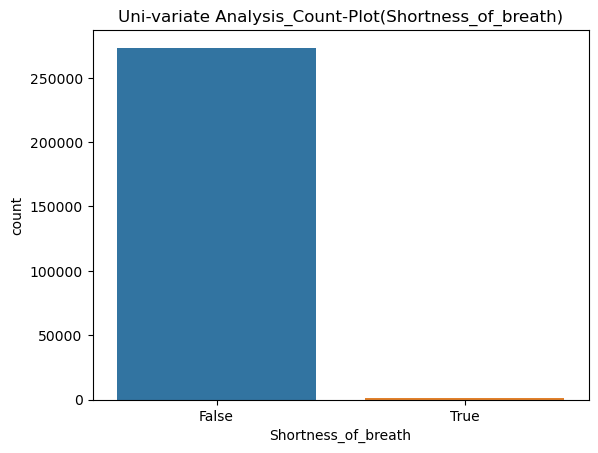

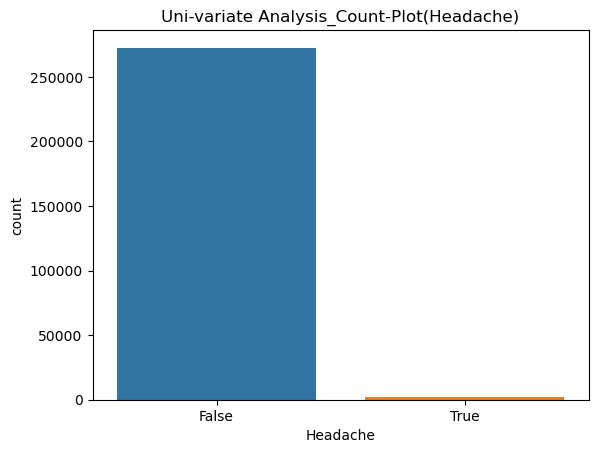

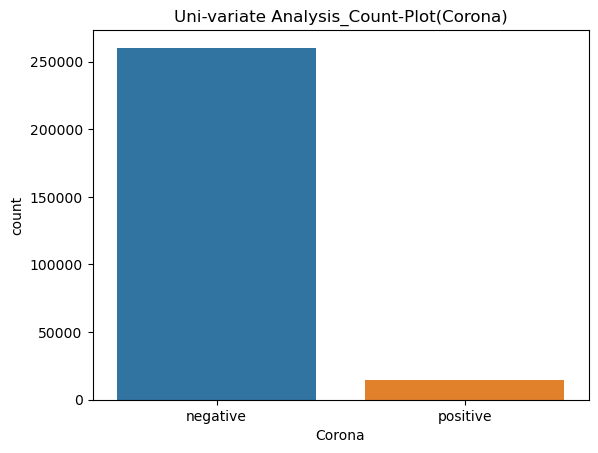

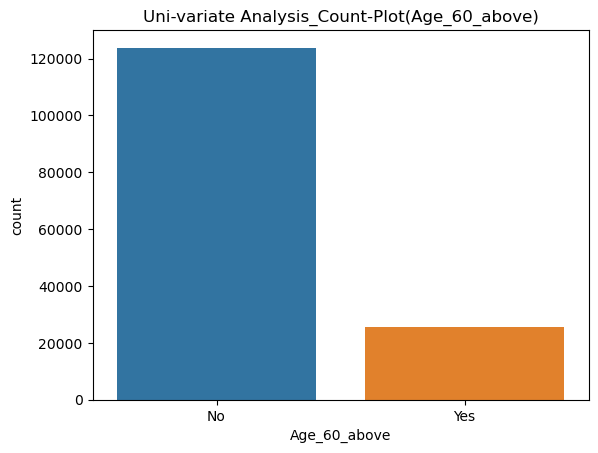

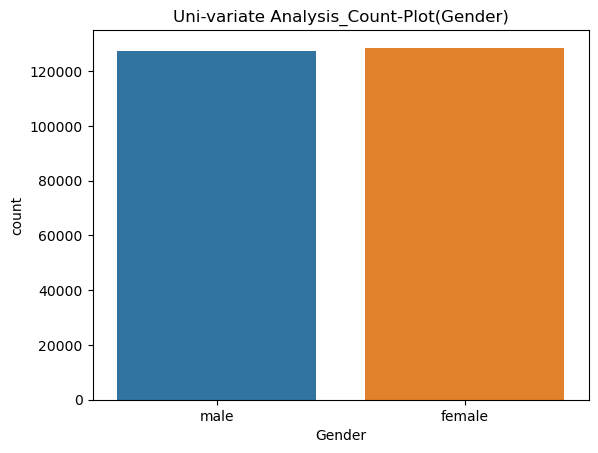

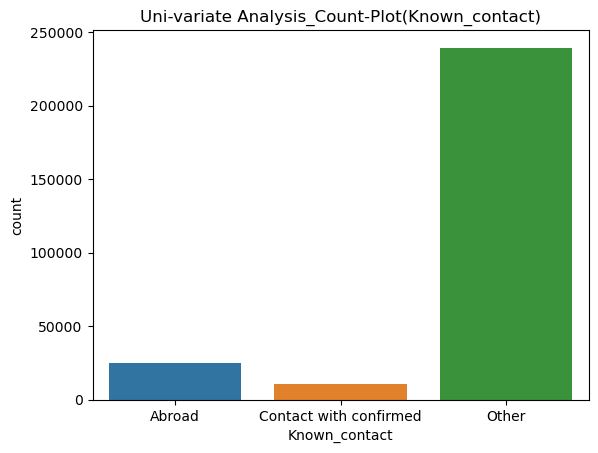

In [25]:
import warnings
warnings.filterwarnings('ignore')

for features in cat_cols:
    sns.countplot(data = cat_cols, x = features)
    plt.title(f"Uni-variate Analysis_Count-Plot({features})")
    plt.show()

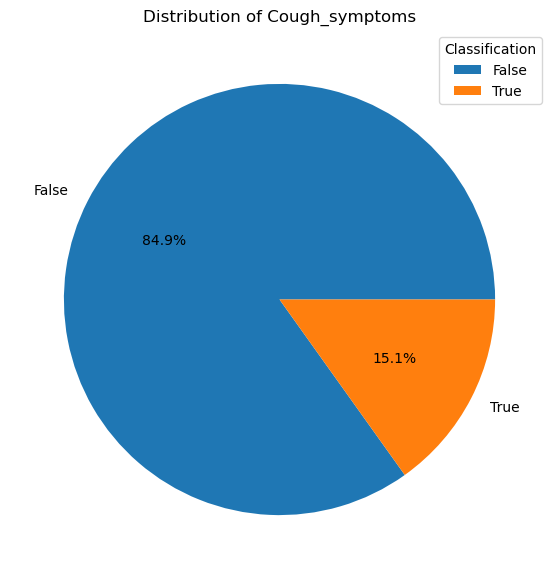

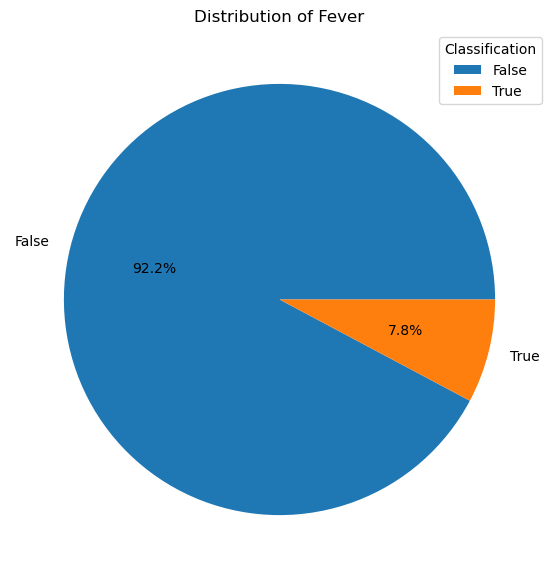

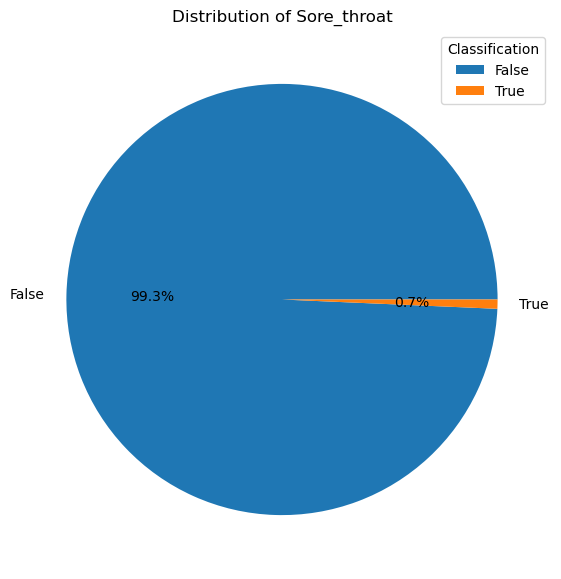

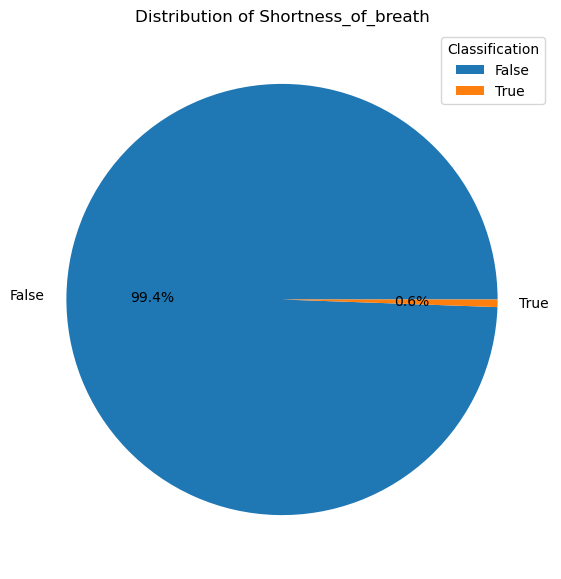

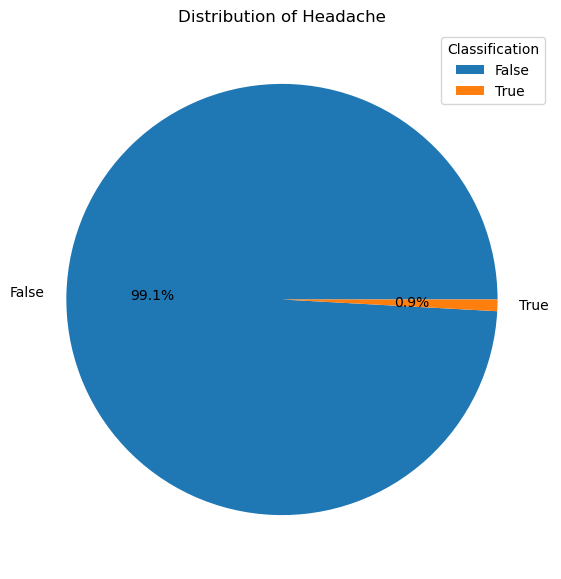

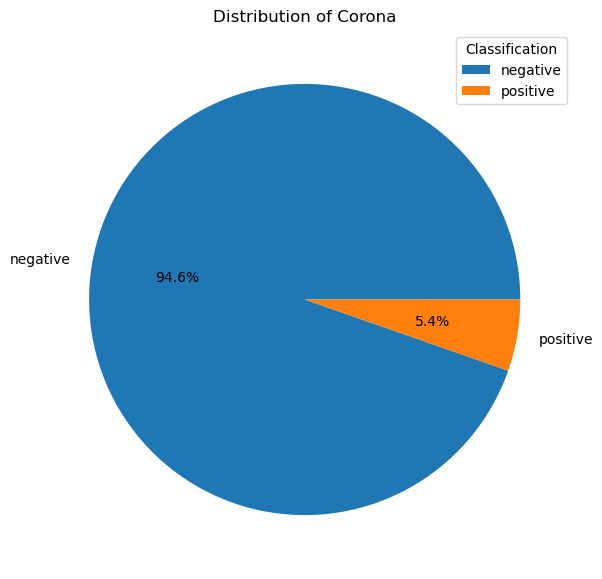

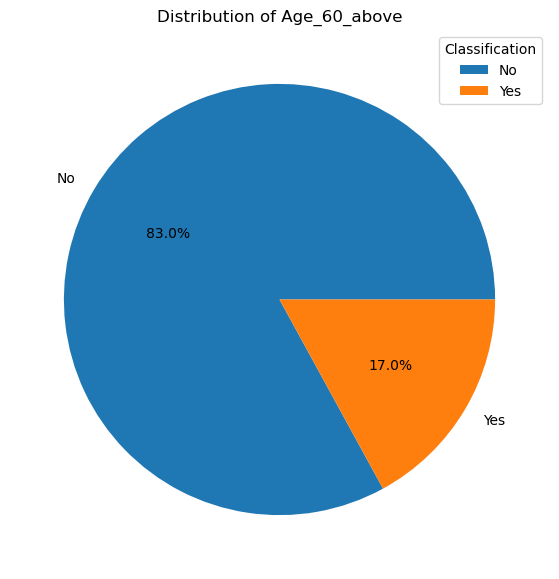

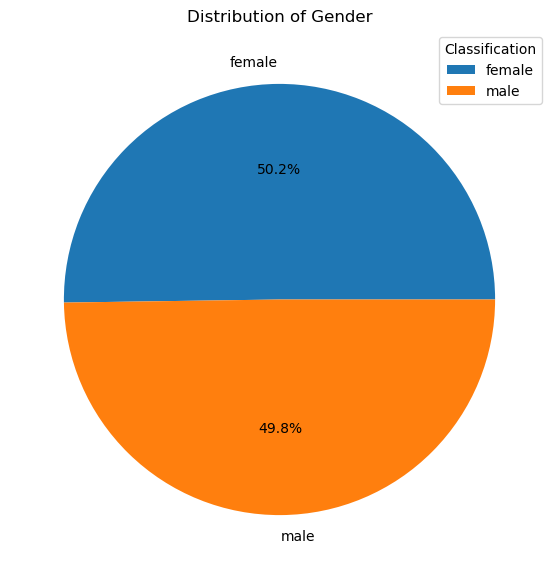

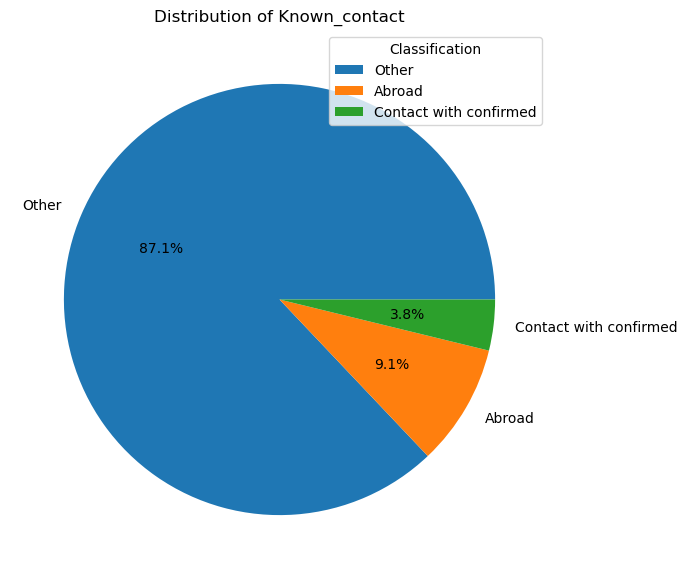

In [26]:
for column in cat_cols:
    plt.figure(figsize=(10, 7))
    plt.pie(corona[column].value_counts(), labels=corona[column].value_counts().index, autopct='%1.1f%%')
    plt.title(f'Distribution of {column}')
    plt.legend(title = 'Classification',loc = 'upper right')
    plt.show()

1. Over 200,000 individuals (out of 278,848) do not exhibit cough symptoms, while around 50,000 people reported having cough symptoms.
2. More than 250,000 people show no signs of fever, with approximately 20,000 individuals experiencing fever.
3. The majority of individuals (over 250,000) report no sore throat, whereas around 5,000 people indicate having a sore throat.
4. Similarly, the majority of individuals (over 250,000) do not experience shortness of breath, with around 5,000 individuals reporting this symptom.
5. The majority of individuals (over 250,000) do not have headaches, while around 5,000 individuals report having headaches.
6. The majority of individuals (around 250,000) have tested negative for COVID-19, while approximately 10,000 individuals have tested positive. Additionally, fewer than 5,000 cases fall into the "other" category.
7. A significant portion of the population (around 120,000) is not older than 60 years, while approximately 30,000 individuals are aged 60 or above.
8. The distribution between male and female individuals is roughly equal, each comprising around 120,000 cases.
9. Concerning known contacts, the majority fall into the "Other" category, accounting for around 240,000 cases. Those with a history of contact abroad are approximately 30,000, and individuals who have had contact with confirmed positive patients number under 20,000.

Numeric Feature

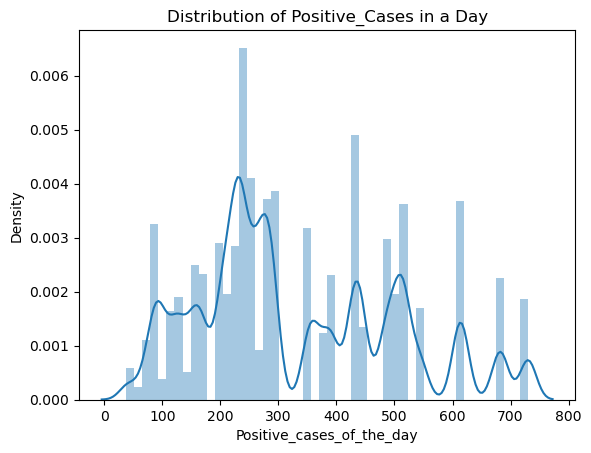

In [27]:
"""Most days recorded an approximate case count of 250."""

sns.distplot(corona['Positive_cases_of_the_day'])
plt.title('Distribution of Positive_Cases in a Day')
plt.show()

## Bi_Variate Analysis

dependant variable = Corona

In [28]:
bi_variate = cat_cols.drop(columns='Corona')

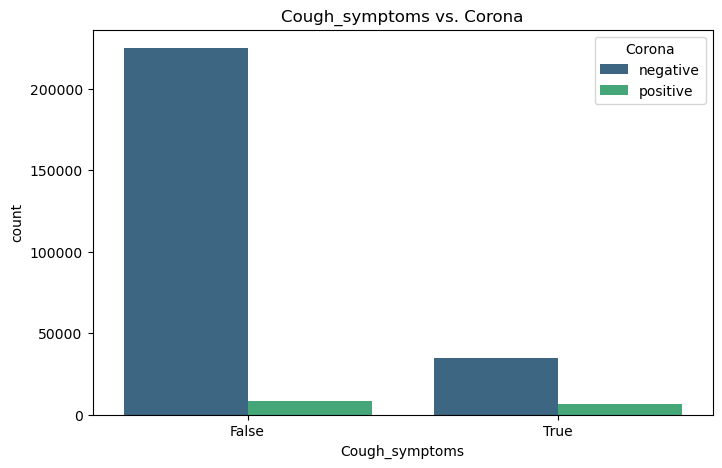

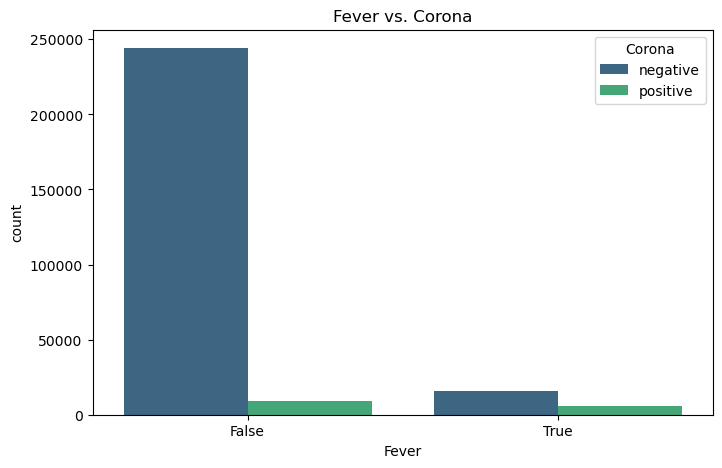

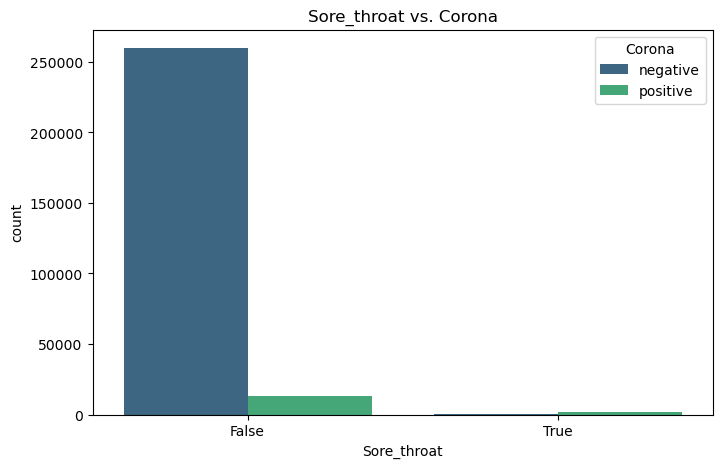

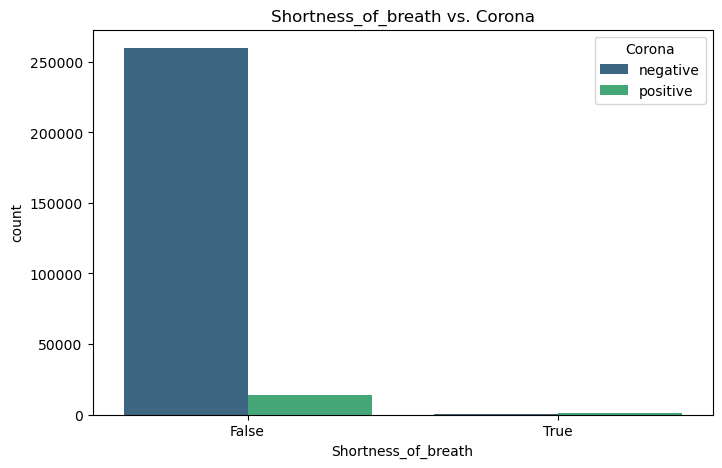

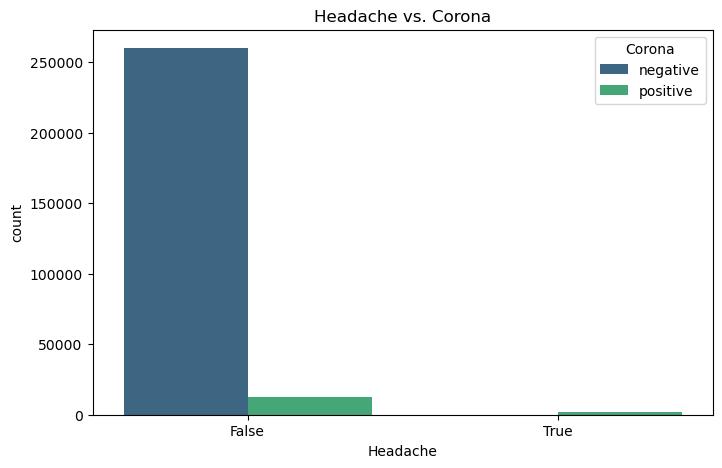

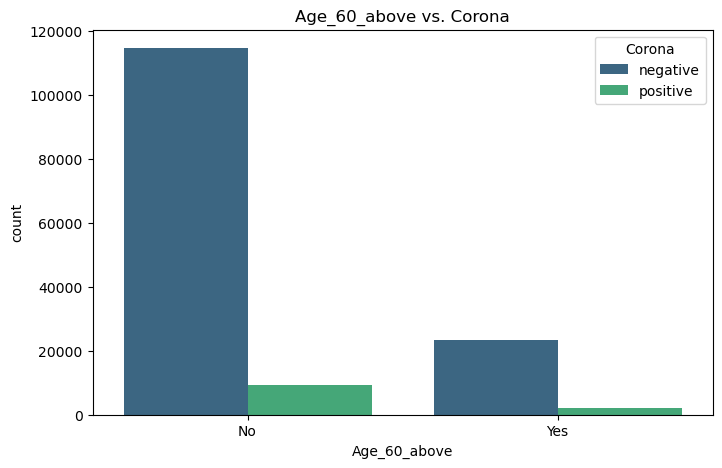

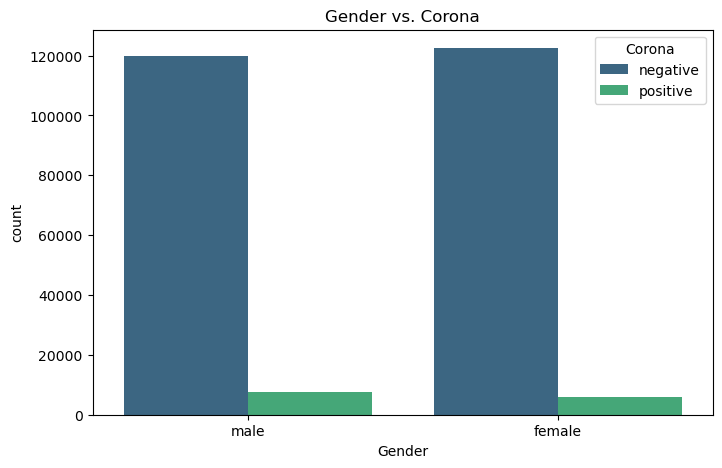

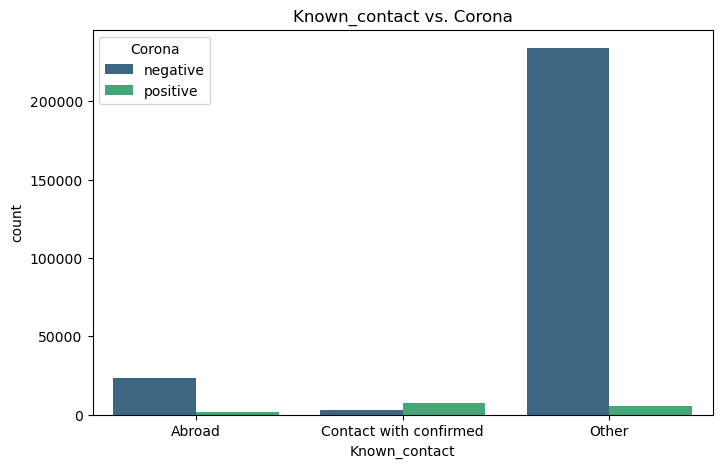

In [29]:
for i in bi_variate:
    plt.figure(figsize=(8, 5))
    sns.countplot(x=i, hue='Corona', data=cat_cols, palette = 'viridis')
    plt.title(f'{i} vs. Corona')
    plt.show()

As there seems to be a huge difference between the classe counts of every feature in the dataset, we can conclude that the data is quiet imbalanced. This class imbalance might influence the model's learning process, potentially leading to biased predictions. We might want to look for metrics other than 'accuracy' to asses the performance of models built. 

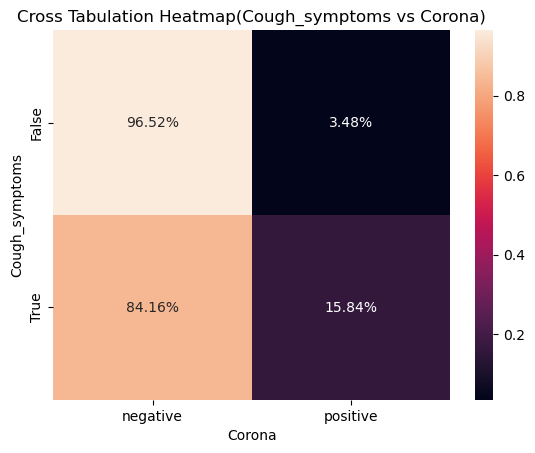

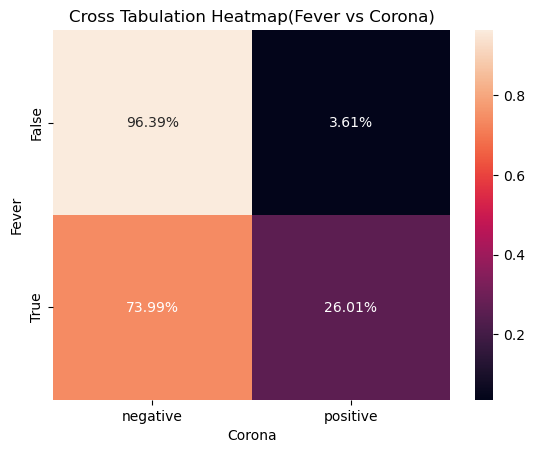

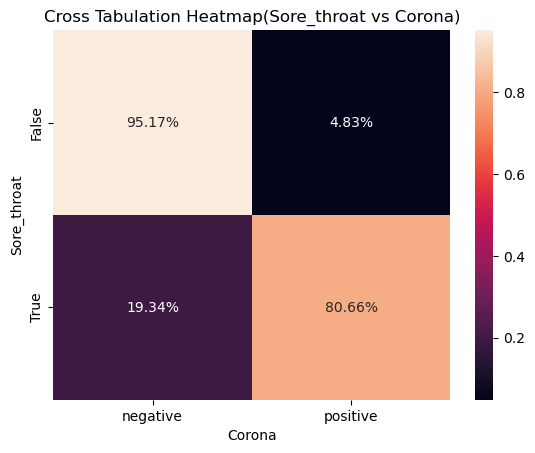

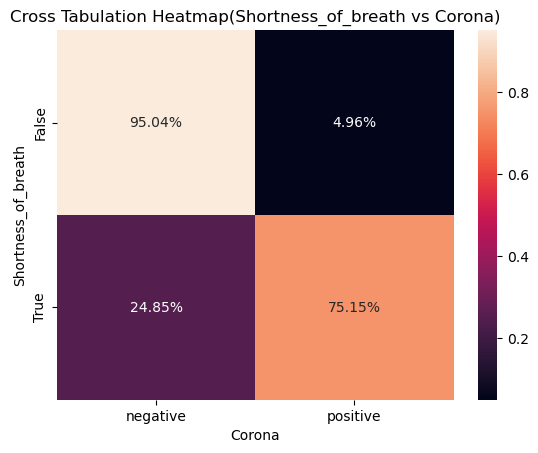

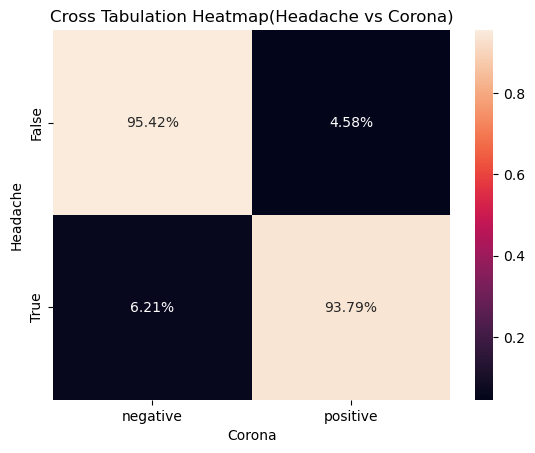

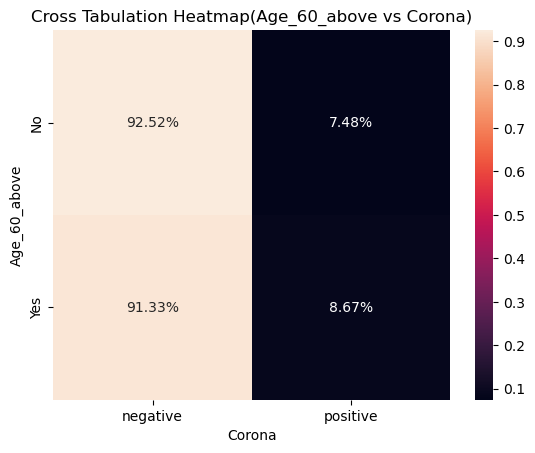

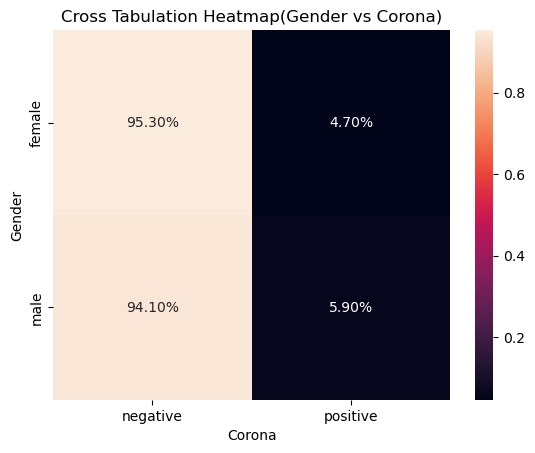

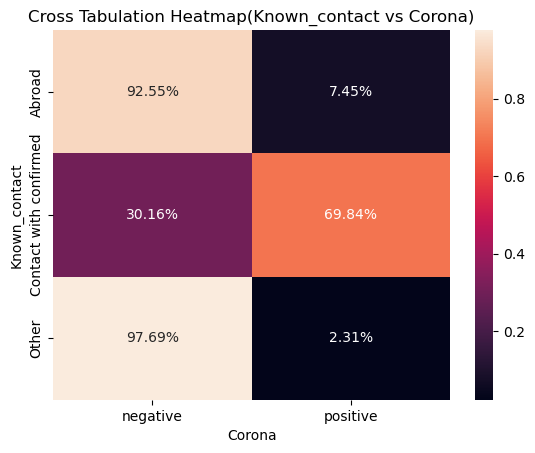

In [30]:
for features in bi_variate:
    cross_table = pd.crosstab(corona[features], corona['Corona'], normalize='index')
    sns.heatmap(cross_table, annot=True, fmt= '.2%', cbar=True)
    plt.title(f'Cross Tabulation Heatmap({features} vs Corona)')
    plt.show()

1. For individuals without a cough, 3.48% tested positive, while those with a cough had a positive rate of 15.8%.
2. Among those without a fever, 3.61% tested positive, compared to a 26% positive rate for individuals with fever.
3. Individuals without a sore throat had a 4.83% positive rate, while those with a sore throat exhibited an 80.66% positive rate.
4. Those without shortness of breath had a 4.96% positive rate, whereas those with shortness of breath showed a 75.15% positive rate.
5. Individuals without a headache had a 4.96% positive rate, whereas those with a headache had a higher positive rate of 93.79%.
6. The positive rate for individuals under 60 years of age was 7.48%, compared to 8.97% for those above 60.
7. Females had a positive rate of 4.70%, while males had a slightly higher rate of 5.90%.
8. Those with contact abroad had a positive rate of 7.45%, individuals with contact with an infected person had a high positive rate of 69.84%, and the remaining category had a positive rate of 2.31%.

## Missing Value Treatment and Encoding 

In [31]:
corona.isnull().sum()

Cough_symptoms                  252
Fever                           252
Sore_throat                       1
Shortness_of_breath               1
Headache                          1
Corona                            0
Age_60_above                 125664
Gender                        19045
Known_contact                     0
Positive_cases_of_the_day         0
dtype: int64

In [32]:
corona.shape

(274956, 10)

In [33]:
# missing value treatment for Cough_symptoms and Fever

corona['Cough_symptoms'].fillna(corona['Cough_symptoms'].mode()[0], inplace=True)
corona['Fever'].fillna(corona['Fever'].mode()[0], inplace=True)

In [34]:
# missing value treatment for Sore_throat, Shortness_of_breath, Headache
corona.dropna(subset=['Sore_throat', 'Shortness_of_breath', 'Headache'], inplace=True)

In [35]:
# missing value treatment for Gender
corona['Gender'].fillna(corona['Gender'].mode()[0], inplace=True)

In [36]:
corona.isna().sum()

Cough_symptoms                    0
Fever                             0
Sore_throat                       0
Shortness_of_breath               0
Headache                          0
Corona                            0
Age_60_above                 125663
Gender                            0
Known_contact                     0
Positive_cases_of_the_day         0
dtype: int64

#### Imputing the missing values for 'Age_60_above' using a Logisting Regression model

First let us consider the missing values from 'Age_60_above' as a separate category. Therefore imputing, the nan values by 'Missing'. Later this data set is encoded to make it ready for logistic reggression prediction of the missing values

In [37]:
corona['Age_60_above'].fillna(value = 'missing', inplace=True)

In [38]:
data_age = corona[corona['Age_60_above'] != 'missing']

In [39]:
data_age.shape

(149292, 10)

In [40]:
data_age

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Gender,Known_contact,Positive_cases_of_the_day
Ind_ID,,,,,,,,,,
4514,False,False,False,True,False,negative,No,female,Abroad,95
4516,False,False,False,False,False,positive,No,female,Other,95
4517,False,False,False,False,False,negative,No,female,Other,95
4518,False,False,False,False,False,negative,No,female,Other,95
4519,False,False,False,False,False,negative,No,female,Other,95
...,...,...,...,...,...,...,...,...,...,...
156036,True,False,True,False,False,negative,Yes,male,Abroad,354
156037,True,False,True,True,False,negative,No,male,Abroad,354
156038,True,True,False,False,False,negative,No,female,Abroad,354


In [41]:
"""Now the data should be encoded to feed it into the LogisticReggresion Model, to train it so that 
predictions for Age_60_avbove can be made"""

cat_cols = data_age.drop(columns = ['Age_60_above', 'Positive_cases_of_the_day', 'Known_contact'])
cat_cols2 = data_age['Known_contact']
num_cols = data_age['Positive_cases_of_the_day']

# One hot encoding
df1 = pd.get_dummies(cat_cols, dtype = int, drop_first = True)
df2 = pd.get_dummies(cat_cols2, dtype = int)

In [42]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
label = data_age['Age_60_above']
label = pd.DataFrame(le.fit_transform(label), columns = ['Age_60_above'])
label = label.set_index(data_age.index)
label

,Age_60_above
Ind_ID,
4514,0
4516,0
4517,0
4518,0
4519,0
...,...
156036,1
156037,0
156038,0


In [43]:
data_age = pd.concat([df1, num_cols, df2, label], axis=1)
data_age

,Cough_symptoms,Fever,Sore_throat_True,Shortness_of_breath_True,Headache_True,Corona_positive,Gender_male,Positive_cases_of_the_day,Abroad,Contact with confirmed,Other,Age_60_above
Ind_ID,,,,,,,,,,,,
4514,False,False,0,1,0,0,0,95,1,0,0,0
4516,False,False,0,0,0,1,0,95,0,0,1,0
4517,False,False,0,0,0,0,0,95,0,0,1,0
4518,False,False,0,0,0,0,0,95,0,0,1,0
4519,False,False,0,0,0,0,0,95,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
156036,True,False,1,0,0,0,1,354,1,0,0,1
156037,True,False,1,1,0,0,1,354,1,0,0,0
156038,True,True,0,0,0,0,0,354,1,0,0,0


In [44]:
# As we have encoded dataset, let's make prediction for Age_60_above using Logistic Reggression model

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = data_age.drop(columns = 'Age_60_above')
y = data_age['Age_60_above']

# split the model for train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=9)

# Initialize the model
Age_60_model = LogisticRegression()

# Train the model
Age_60_model.fit(X_train, y_train)

# Make prediction to check accuracy
y_predict = Age_60_model.predict(X_test)

# Evaluate the accuracy of predictions
print("Accuracy: ", accuracy_score(y_test, y_predict))

Accuracy:  0.826116078904183


In [45]:
# Predicting the missing values for Age_60_above

# create a data frame containing only those data points with missing values for Age_60_above category
predict_missing = corona[corona['Age_60_above'] == 'missing']

# Now the data should be encoded to feed it into the LogisticReggresion Model
cat_cols = predict_missing.drop(columns = ['Age_60_above', 'Positive_cases_of_the_day', 'Known_contact'])
cat_cols2 = predict_missing['Known_contact']
num_cols = predict_missing['Positive_cases_of_the_day']

# One hot encoding
df1 = pd.get_dummies(cat_cols, dtype = int, drop_first = True)
df2 = pd.get_dummies(cat_cols2, dtype = int)

In [46]:
"""This data set holds all of the datapoints with all the features that are necessary to predict whether 
the person's age is above 60 or not."""
predict_missing = pd.concat([df1, num_cols, df2], axis=1)
predict_missing

,Cough_symptoms,Fever,Sore_throat_True,Shortness_of_breath_True,Headache_True,Corona_positive,Gender_male,Positive_cases_of_the_day,Abroad,Contact with confirmed,Other
Ind_ID,,,,,,,,,,,
1,True,False,1,0,0,0,0,41,1,0,0
2,False,True,0,0,0,1,0,41,1,0,0
3,False,True,0,0,0,1,0,41,1,0,0
4,True,False,0,0,0,0,0,41,1,0,0
5,True,False,0,0,0,0,0,41,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
278844,False,False,0,0,0,1,1,153,0,0,1
278845,False,False,0,0,0,0,0,153,0,0,1
278846,False,False,0,0,0,0,1,153,0,0,1


In [47]:
# Make prediction for the Age_60_above
y_predict_missing = Age_60_model.predict(predict_missing)

In [48]:
# Store the predictions in a data frame
y_predict_missing = pd.DataFrame(y_predict_missing, columns = ['Age_60_above'])
y_predict_missing = y_predict_missing.set_index(predict_missing.index)
y_predict_missing

,Age_60_above
Ind_ID,
1,0
2,0
3,0
4,0
5,0
...,...
278844,0
278845,0
278846,0


In [49]:
# Encoding the corona data set
from sklearn.preprocessing import LabelEncoder

le_corona=LabelEncoder()
label = corona['Corona']
label =pd.DataFrame(le_corona.fit_transform(label), columns = ['Corona'])

In [50]:
for class_name, encoded_value in zip(le_corona.classes_, le_corona.transform(le_corona.classes_)):
    print(f"Class: {class_name}, Encoded Value: {encoded_value}")

Class: negative, Encoded Value: 0
Class: positive, Encoded Value: 1


In [51]:
label = label.set_index(corona.index)
label

,Corona
Ind_ID,
1,0
2,1
3,1
4,0
5,0
...,...
278844,1
278845,0
278846,0


In [52]:
"""Dividing the categorical columns into two parts so that one hot encoding is done on one of them and
label encoding is done on the other"""

categorical_columns = ['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache', 'Gender', 'Known_contact']
categorical_columns2 = ['Age_60_above']
df1 = pd.get_dummies(corona[categorical_columns], dtype=int)

In [53]:
# Performing label encoding on the Age_60_above column as it contains missing values as a separate category.
# In total this column has 3 classes

df2 = pd.DataFrame(le.fit_transform(corona[categorical_columns2]), columns = ['Age_60_above'])
df2 = df2.set_index(corona.index)
df2

,Age_60_above
Ind_ID,
1,2
2,2
3,2
4,2
5,2
...,...
278844,2
278845,2
278846,2


In [54]:
# Number assigned for each class in the Age_60_above column

for class_name, encoded_value in zip(le.classes_, le.transform(le.classes_)):
    print(f"Class: {class_name}, Encoded Value: {encoded_value}")

Class: No, Encoded Value: 0
Class: Yes, Encoded Value: 1
Class: missing, Encoded Value: 2


In [55]:
df1['Cough_symptoms'] = df1['Cough_symptoms'].astype(int)
df1['Fever'] = df1['Fever'].astype(int)

In [56]:
df1.drop(columns=['Sore_throat_False','Shortness_of_breath_False','Headache_False','Gender_female'], inplace=True)

In [57]:
df1

,Cough_symptoms,Fever,Sore_throat_True,Shortness_of_breath_True,Headache_True,Gender_male,Known_contact_Abroad,Known_contact_Contact with confirmed,Known_contact_Other
Ind_ID,,,,,,,,,
1,1,0,1,0,0,0,1,0,0
2,0,1,0,0,0,0,1,0,0
3,0,1,0,0,0,0,1,0,0
4,1,0,0,0,0,0,1,0,0
5,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
278844,0,0,0,0,0,1,0,0,1
278845,0,0,0,0,0,0,0,0,1
278846,0,0,0,0,0,1,0,0,1


In [58]:
# Concating all the encoded features into a single dataframe.

corona = pd.concat([df1, df2, corona['Positive_cases_of_the_day'], label], axis=1)
corona

,Cough_symptoms,Fever,Sore_throat_True,Shortness_of_breath_True,Headache_True,Gender_male,Known_contact_Abroad,Known_contact_Contact with confirmed,Known_contact_Other,Age_60_above,Positive_cases_of_the_day,Corona
Ind_ID,,,,,,,,,,,,
1,1,0,1,0,0,0,1,0,0,2,41,0
2,0,1,0,0,0,0,1,0,0,2,41,1
3,0,1,0,0,0,0,1,0,0,2,41,1
4,1,0,0,0,0,0,1,0,0,2,41,0
5,1,0,0,0,0,0,0,1,0,2,41,0
...,...,...,...,...,...,...,...,...,...,...,...,...
278844,0,0,0,0,0,1,0,0,1,2,153,1
278845,0,0,0,0,0,0,0,0,1,2,153,0
278846,0,0,0,0,0,1,0,0,1,2,153,0


Now, imputing the predicted missing values into the Age_60_above column

In [59]:
corona.loc[y_predict_missing.index, 'Age_60_above'] = y_predict_missing['Age_60_above']

In [60]:
corona

,Cough_symptoms,Fever,Sore_throat_True,Shortness_of_breath_True,Headache_True,Gender_male,Known_contact_Abroad,Known_contact_Contact with confirmed,Known_contact_Other,Age_60_above,Positive_cases_of_the_day,Corona
Ind_ID,,,,,,,,,,,,
1,1,0,1,0,0,0,1,0,0,0,41,0
2,0,1,0,0,0,0,1,0,0,0,41,1
3,0,1,0,0,0,0,1,0,0,0,41,1
4,1,0,0,0,0,0,1,0,0,0,41,0
5,1,0,0,0,0,0,0,1,0,0,41,0
...,...,...,...,...,...,...,...,...,...,...,...,...
278844,0,0,0,0,0,1,0,0,1,0,153,1
278845,0,0,0,0,0,0,0,0,1,0,153,0
278846,0,0,0,0,0,1,0,0,1,0,153,0


# Machine Learning

For this Project, I have chosen 4 Classification models

1. Logisticregression

In [130]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [51]:
X = corona.drop(columns=['Corona'])
y = corona['Corona']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [52]:
# Initialize the model
log_reg = LogisticRegression()

# Train the model
log_reg.fit(X_train,y_train)

# Make predictions
y_predict = log_reg.predict(X_test)

In [53]:
print("Performance of the model on Test Set:")
print("Accuracy :", accuracy_score(y_test, y_predict))
print("Precision :", precision_score(y_test, y_predict))
print("Recall :", recall_score(y_test, y_predict))
print("f1-Score :", f1_score(y_test, y_predict))
print("---------------------------------------------")
features = list(X_train.columns)
coefficients = [-2.75332127e-02,  2.00446039e+00,  2.69425964e+00,  2.25150075e+00,
        4.06795102e+00, -1.10012450e+00, -6.25121886e-01,  2.97496886e-01,
       -1.18583013e+00,  1.62283028e+00, -2.16224654e+00,  1.88170451e-03]
for features, coefficients in zip(features, coefficients):
    print(f"Feature : {features}, Co-Efficient : {coefficients}")


Performance of the model on Test Set:
Accuracy : 0.9624120310596279
Precision : 0.728140703517588
Recall : 0.48705882352941177
f1-Score : 0.5836858006042296
---------------------------------------------
Feature : Cough_symptoms, Co-Efficient : -0.0275332127
Feature : Fever, Co-Efficient : 2.00446039
Feature : Sore_throat_True, Co-Efficient : 2.69425964
Feature : Shortness_of_breath_True, Co-Efficient : 2.25150075
Feature : Headache_True, Co-Efficient : 4.06795102
Feature : Age_60_above_Yes, Co-Efficient : -1.1001245
Feature : Gender_male, Co-Efficient : -0.625121886
Feature : Known_contact_Abroad, Co-Efficient : 0.297496886
Feature : Known_contact_Contact with confirmed, Co-Efficient : -1.18583013
Feature : Known_contact_Other, Co-Efficient : 1.62283028
Feature : Positive_cases_of_the_day, Co-Efficient : -2.16224654


After analyzing the coefficients, it appears that the features 'Cough_symptoms' and the recently introduced feature 'Positive_cases_of_the_day' may not significantly contribute to the model. To further validate these findings, an additional analysis using a different model will be performed. However, as an initial step, 'Positive_cases_of_the_day' will be dropped from the current model, and the accuracy will be reevaluated.

In [54]:
X = X.drop(columns='Positive_cases_of_the_day')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

log_reg.fit(X_train, y_train)
y_predict = log_reg.predict(X_test)

print("Performance of the model on Test Set:")
print("Accuracy :", accuracy_score(y_test, y_predict))
print("Precision :", precision_score(y_test, y_predict))
print("Recall :", recall_score(y_test, y_predict))
print("f1-Score :", f1_score(y_test, y_predict))
print("---------------------------------------------")
features = list(X_train.columns)
coefficients = [-2.75332127e-02,  2.00446039e+00,  2.69425964e+00,  2.25150075e+00,
        4.06795102e+00, -1.10012450e+00, -6.25121886e-01,  2.97496886e-01,
       -1.18583013e+00,  1.62283028e+00, -2.16224654e+00,  1.88170451e-03]
for features, coefficients in zip(features, coefficients):
    print(f"Feature : {features}, Co-Efficient : {coefficients}")


Performance of the model on Test Set:
Accuracy : 0.9621392591514976
Precision : 0.713534194165471
Recall : 0.5015126050420168
f1-Score : 0.5890248716936438
---------------------------------------------
Feature : Cough_symptoms, Co-Efficient : -0.0275332127
Feature : Fever, Co-Efficient : 2.00446039
Feature : Sore_throat_True, Co-Efficient : 2.69425964
Feature : Shortness_of_breath_True, Co-Efficient : 2.25150075
Feature : Headache_True, Co-Efficient : 4.06795102
Feature : Age_60_above_Yes, Co-Efficient : -1.1001245
Feature : Gender_male, Co-Efficient : -0.625121886
Feature : Known_contact_Abroad, Co-Efficient : 0.297496886
Feature : Known_contact_Contact with confirmed, Co-Efficient : -1.18583013
Feature : Known_contact_Other, Co-Efficient : 1.62283028


2. Decision Tree

In [55]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report

In [56]:
# Split the data for train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

# Initialize the model
dt_model = DecisionTreeClassifier()

# Train the model on validation set
dt_model.fit(X_train,y_train)

# Make prdiction
train_predict = dt_model.predict(X_train)
y_predict = dt_model.predict(X_test)

print('Train Accuracy:')
print(classification_report(y_train, train_predict))
print('============================================')
print('Test Accuracy:')
print(classification_report(y_test, y_predict))

Train Accuracy:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98    208179
           1       0.79      0.55      0.65     11785

    accuracy                           0.97    219964
   macro avg       0.88      0.77      0.82    219964
weighted avg       0.97      0.97      0.97    219964

Test Accuracy:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     52048
           1       0.79      0.56      0.65      2943

    accuracy                           0.97     54991
   macro avg       0.88      0.78      0.82     54991
weighted avg       0.97      0.97      0.97     54991



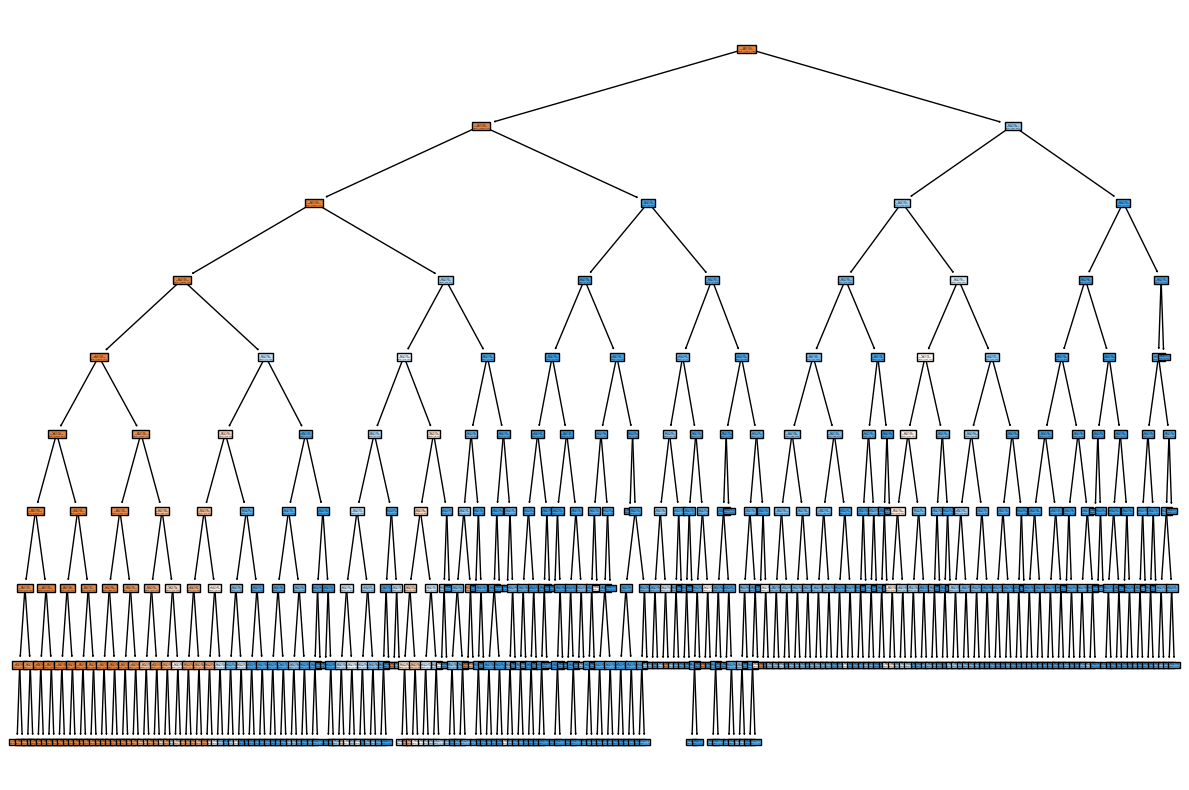

In [57]:
plt.figure(figsize = (15,10))
plot_tree(dt_model, filled=True, node_ids=True);

The model appears to demonstrate consistent performance without overfitting, as evidenced by its accuracy rates of 97% both the training and validation sets, respectively. To explore potential improvements, we will implement pruning techniques on the decision tree to assess if accuracy can be further enhanced.

In [58]:
# Perform Pruning
dt_model = DecisionTreeClassifier(max_depth = 4, min_samples_split = 20, min_samples_leaf = 10, random_state=42)

# Train the model on validation set
dt_model.fit(X_train,y_train)

# Make prdiction
train_predict = dt_model.predict(X_train)
y_predict = dt_model.predict(X_test)

print('Train Accuracy:')
print(classification_report(y_train, train_predict))
print('============================================')
print('Test Accuracy:')
print(classification_report(y_test,y_predict))

Train Accuracy:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98    208179
           1       0.77      0.53      0.63     11785

    accuracy                           0.97    219964
   macro avg       0.87      0.76      0.81    219964
weighted avg       0.96      0.97      0.96    219964

Test Accuracy:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     52048
           1       0.79      0.54      0.64      2943

    accuracy                           0.97     54991
   macro avg       0.88      0.77      0.81     54991
weighted avg       0.96      0.97      0.96     54991



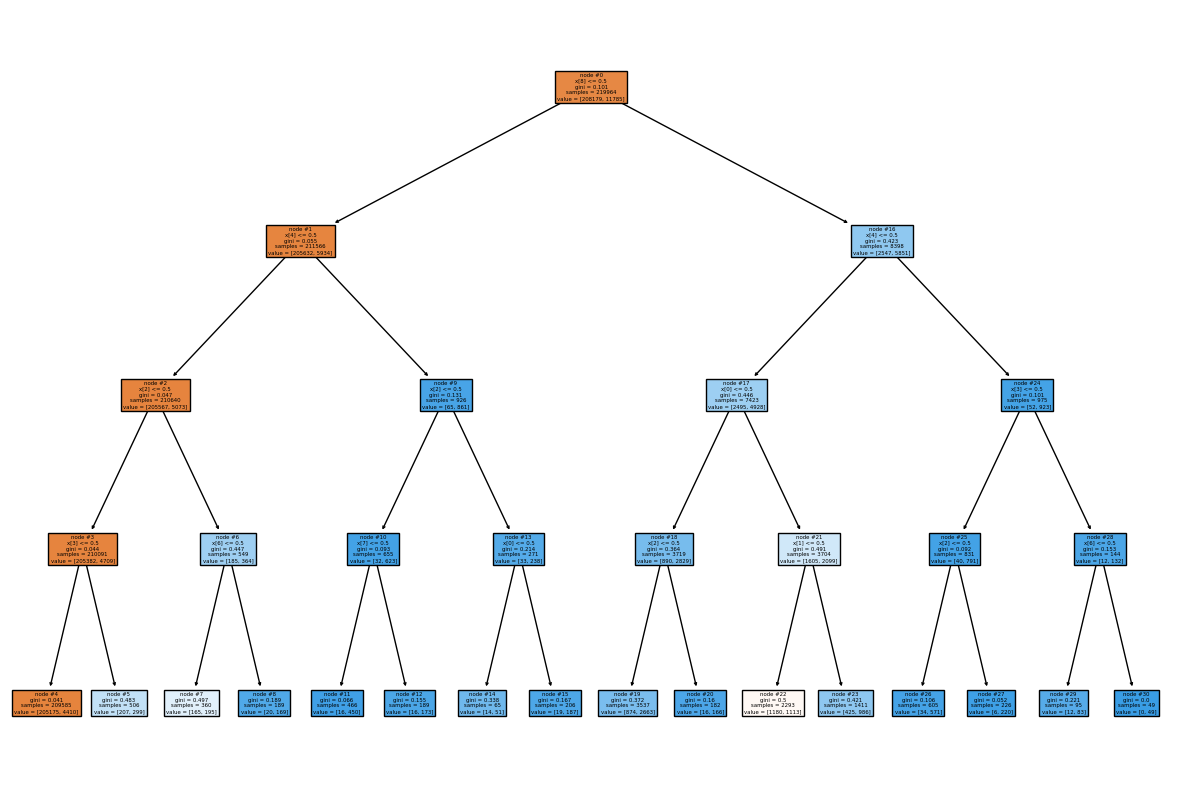

In [62]:
plt.figure(figsize = (15,10))
plot_tree(dt_model, filled=True, node_ids=True);

After applying pruning to the decision tree, the observed trend persists, with no significant change in accuracy. The model continues to exhibit stability, maintaining an accuracy of around 97%.

In [63]:
Importances = pd.DataFrame(dt_model.feature_importances_, index = X_train.columns, columns = ['Importances']).sort_values(by='Importances', ascending=False)
Importances

,Importances
Known_contact_Contact with confirmed,0.728464
Headache_True,0.166452
Sore_throat_True,0.046445
Shortness_of_breath_True,0.033096
Cough_symptoms,0.014239
Fever,0.008024
Gender_male,0.003210
Known_contact_Abroad,0.000069
Age_60_above_Yes,0.000000
Known_contact_Other,0.000000


In [64]:
Importances['Cumulative'] = Importances['Importances'].cumsum()
Importances

,Importances,Cumulative
Known_contact_Contact with confirmed,0.728464,0.728464
Headache_True,0.166452,0.894916
Sore_throat_True,0.046445,0.941362
Shortness_of_breath_True,0.033096,0.974457
Cough_symptoms,0.014239,0.988697
Fever,0.008024,0.996721
Gender_male,0.003210,0.999931
Known_contact_Abroad,0.000069,1.000000
Age_60_above_Yes,0.000000,1.000000
Known_contact_Other,0.000000,1.000000


According to the decision tree analysis, approximately 99.96% of the data can be effectively predicted using a subset of features, including 'Known_contact_Contact with confirmed,' 'Headache,' 'Fever,' 'Sore_throat,' 'Shortness_of_breath,' and 'Cough_symptoms.' While these features contribute significantly to the model's predictive capability, further exploration will be conducted with other models and their respective feature importances to identify potential optimizations and select the best model for achieving optimal accuracy.

3. Random Forest

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
# Split the data for train test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3)

# Initialize the model
rf_model = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth= 8, min_samples_split=50, 
                                  min_samples_leaf=20, random_state= 43)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
train_predict = rf_model.predict(X_train)
y_predict = rf_model.predict(X_test)

print('Train Accuracy:')
print(classification_report(y_train, train_predict))
print('============================================')
print('Test Accuracy:')
print(classification_report(y_test,y_predict))-

Train Accuracy:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98    208203
           1       0.80      0.54      0.65     11761

    accuracy                           0.97    219964
   macro avg       0.89      0.77      0.81    219964
weighted avg       0.97      0.97      0.97    219964

Test Accuracy:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     52024
           1       0.78      0.54      0.64      2967

    accuracy                           0.97     54991
   macro avg       0.88      0.77      0.81     54991
weighted avg       0.96      0.97      0.96     54991



Now let's perform hyperparametric tuning and cross validation to obtain the best Random forest Model

In [83]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [84]:
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [5,8,10],
    'min_samples_split': [10, 15, 25,  50],
    'min_samples_leaf': [5, 15, 25,55]
}

grid_search = GridSearchCV(estimator = rf_model, param_grid = param_grid, scoring='accuracy', cv=5)

# train the model
grid_search.fit(X_train, y_train) 

# Print the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)
print("")

# Evaluate the model with Cross_validation
best_rf_model = grid_search.best_estimator_
rf_cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=10, scoring='accuracy')
print("Cross-Validation Scores:", rf_cv_scores)
print("")
print("Mean CV Accuracy:", rf_cv_scores.mean())

# Using the best RandomForest Model to train 
best_rf_model.fit(X_train, y_train)

# Evaluate the model performance on test data now
y_predict = best_rf_model.predict(X_test)
print("=========================================================")
print("Test Accuracy: ", classification_report(y_test,y_predict))


Best Hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 50, 'n_estimators': 100}

Cross-Validation Scores: [0.96799564 0.96681366 0.96908669 0.96908669 0.96817603 0.96831242
 0.96863066 0.96908529 0.9693126  0.96726678]

Mean CV Accuracy: 0.9683766458325174
Test Accuracy:                precision    recall  f1-score   support

           0       0.97      0.99      0.98     52024
           1       0.77      0.55      0.64      2967

    accuracy                           0.97     54991
   macro avg       0.87      0.77      0.81     54991
weighted avg       0.96      0.97      0.96     54991



In [85]:
Importance = pd.DataFrame(best_rf_model.feature_importances_, columns = ['Importance'], index = X_train.columns).sort_values(by = 'Importance', ascending = False)
Importance

,Importance
Known_contact_Contact with confirmed,0.383453
Headache_True,0.171489
Known_contact_Other,0.130187
Known_contact_Abroad,0.082051
Sore_throat_True,0.071110
Fever,0.055890
Shortness_of_breath_True,0.048243
Cough_symptoms,0.037078
Age_60_above_Yes,0.012873
Gender_male,0.007626


In [90]:
Importance['Cumulative'] = Importance['Importance'].cumsum()
Importance

,Importance,Cumulative
Known_contact_Contact with confirmed,0.383453,0.383453
Headache_True,0.171489,0.554942
Known_contact_Other,0.130187,0.685129
Known_contact_Abroad,0.082051,0.767180
Sore_throat_True,0.071110,0.838290
Fever,0.055890,0.894181
Shortness_of_breath_True,0.048243,0.942423
Cough_symptoms,0.037078,0.979501
Age_60_above_Yes,0.012873,0.992374
Gender_male,0.007626,1.000000


4. XGB Classifier

In [65]:
from xgboost import XGBClassifier, plot_tree
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report

#Intialize the model
xgb_model = xgb.XGBClassifier()

# Give various parameters 
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'objective': ['binary:logistic'],
    'eval_metric': ['logloss'],
    'max_depth': [5,8,10],
    'learning_rate': [0.01, 0.1, 0.2],
    'min_child_weight': [1, 3, 5],
    'reg_alpha': [0.01, 0.1, 1.0]
}

#split the data for train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 4)

# Initialize a grid search
grid_search = GridSearchCV(estimator = xgb_model, param_grid = param_grid, scoring='accuracy', cv=5)

# Train the model
grid_search.fit(X_train, y_train)

# print the best hyper parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)
print(" ")

# Evaluate the model with cross validation
best_xgb_model = grid_search.best_estimator_
xgb_cv_scores = cross_val_score(best_xgb_model, X_train, y_train, cv=10, scoring = 'accuracy')
print("Cross-Validation Scores:", xgb_cv_scores)
print("")
print("Mean CV Accuracy:", xgb_cv_scores.mean())
print("=============================================================")

# Use the cross validated model to train
best_xgb_model.fit(X_train, y_train)

# Evaluate themodel performance on the test data
y_predict = best_xgb_model.predict(X_test)

print("Test Accuracy:", classification_report(y_test, y_predict))


Best Hyperparameters: {'eval_metric': 'logloss', 'learning_rate': 0.2, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 150, 'objective': 'binary:logistic', 'reg_alpha': 0.1}
 
Cross-Validation Scores: [0.96831386 0.96795018 0.9684957  0.96945038 0.96963084 0.96708492
 0.96844881 0.96658483 0.96740316 0.96849427]

Mean CV Accuracy: 0.9681856964442647
Test Accuracy:               precision    recall  f1-score   support

           0       0.97      0.99      0.98     52124
           1       0.78      0.54      0.64      2867

    accuracy                           0.97     54991
   macro avg       0.88      0.76      0.81     54991
weighted avg       0.96      0.97      0.97     54991



In [75]:
Importance = pd.DataFrame(best_xgb_model.feature_importances_, columns = ['Importance'], index = X_train.columns).sort_values(by = 'Importance', ascending = False)
Importance

,Importance
Known_contact_Contact with confirmed,0.740613
Headache_True,0.090954
Fever,0.057114
Known_contact_Abroad,0.032750
Sore_throat_True,0.022488
Shortness_of_breath_True,0.019020
Cough_symptoms,0.014753
Age_60_above_Yes,0.014220
Gender_male,0.004641
Known_contact_Other,0.003446


In [76]:
Importance['Cumulative'] = Importance['Importance'].cumsum()
Importance

,Importance,Cumulative
Known_contact_Contact with confirmed,0.740613,0.740613
Headache_True,0.090954,0.831567
Fever,0.057114,0.888681
Known_contact_Abroad,0.032750,0.921431
Sore_throat_True,0.022488,0.943920
Shortness_of_breath_True,0.019020,0.962940
Cough_symptoms,0.014753,0.977693
Age_60_above_Yes,0.014220,0.991913
Gender_male,0.004641,0.996554
Known_contact_Other,0.003446,1.000000


Given that the accuracies across various models are consistently similar, it's sensible to assess the balance of the dataset to determine the significance of precision, recall, and F1-score. This evaluation will help us understand whether there's an imbalance in the distribution of classes and guide us in choosing the appropriate metrics for a more nuanced evaluation of model performance.

In [89]:
for column in df.columns:
    if column != 'Test_date':
        print(df[column].value_counts())

Cough_symptoms
0    233384
1     41571
Name: count, dtype: int64
Fever
0    253580
1     21375
Name: count, dtype: int64
Sore_throat_True
0    273063
1      1892
Name: count, dtype: int64
Shortness_of_breath_True
0    273406
1      1549
Name: count, dtype: int64
Headache_True
0    272572
1      2383
Name: count, dtype: int64
Age_60_above_Yes
0    249530
1     25425
Name: count, dtype: int64
Gender_male
0    147585
1    127370
Name: count, dtype: int64
Known_contact_Abroad
0    249881
1     25074
Name: count, dtype: int64
Known_contact_Contact with confirmed
0    264477
1     10478
Name: count, dtype: int64
Known_contact_Other
1    239403
0     35552
Name: count, dtype: int64


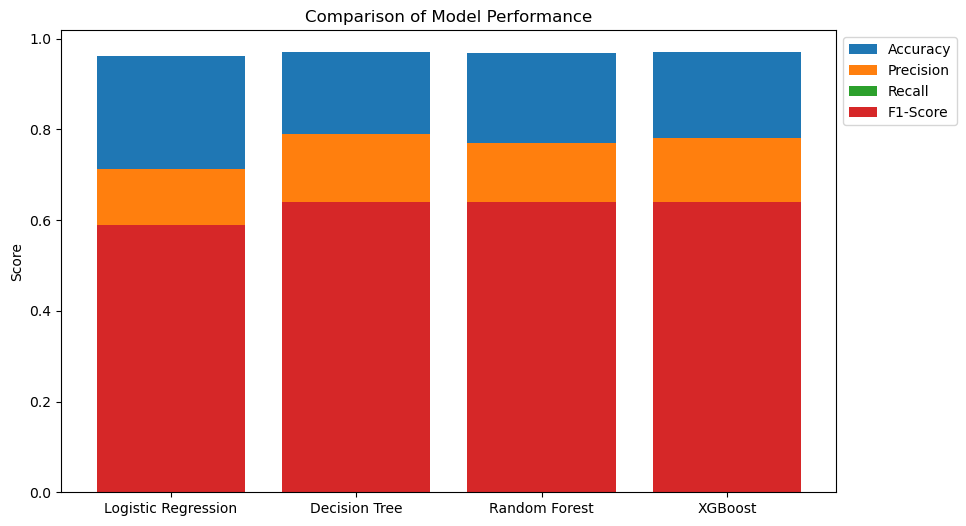

In [2]:
import matplotlib.pyplot as plt

# Model names
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost']

# Metrics for comparison (you can customize this list based on your preferences)
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

# Results for each model and metric
results = [
    [0.962, 0.713, 0.502, 0.589],
    [0.970, 0.790, 0.540, 0.640],
    [0.968, 0.770, 0.550, 0.640],
    [0.970, 0.780, 0.540, 0.640]
]

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

for i, metric in enumerate(metrics):
    values = [result[i] for result in results]
    ax.bar(models, values, label=metric)

# Adding labels and legend
ax.set_ylabel('Score')
ax.set_title('Comparison of Model Performance')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Display the plot
plt.show()


Based on the comprehensive evaluation of model performance metrics, "XGBoost" emerges as the preferred choice for predicting COVID-19 test results. Despite the similar accuracy shared with the Decision Tree model, XGBoost exhibits several advantageous characteristics. The marginally lower precision of 78%, compared to Decision Tree's 79%, is a negligible difference given the overall robustness and resilience of XGBoost.

It less susceptible to overfitting compared to Decision Trees in general. This robustness is crucial for maintaining reliable predictions when faced with new, unseen data. The model achieves a good balance across accuracy, precision, recall, and F1-Score, reinforcing its efficacy in discerning COVID-19 test outcomes.

In [61]:
"""Considering the Feature Importances given by the model, we can conclude that it doesn't learm much from 
the Gender and Known_contact_other"""

# These two features are dropped and the model is built again

new_corona = corona.drop(columns = ['Gender_male', 'Known_contact_Other'])

X = new_corona.drop(columns = 'Corona')
y = new_corona['Corona']

In [62]:
from xgboost import XGBClassifier, plot_tree
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report

#Intialize the model
xgb_model = xgb.XGBClassifier()

# Give various parameters 
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'objective': ['binary:logistic'],
    'eval_metric': ['logloss'],
    'max_depth': [5,8,10],
    'learning_rate': [0.01, 0.1, 0.2],
    'min_child_weight': [1, 3, 5],
    'reg_alpha': [0.01, 0.1, 1.0]
}

#split the data for train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 4)

# Initialize a grid search
grid_search = GridSearchCV(estimator = xgb_model, param_grid = param_grid, scoring='accuracy', cv=5)

# Train the model
grid_search.fit(X_train, y_train)

# print the best hyper parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)
print(" ")

# Evaluate the model with cross validation
best_xgb_model = grid_search.best_estimator_
xgb_cv_scores = cross_val_score(best_xgb_model, X_train, y_train, cv=10, scoring = 'accuracy')
print("Cross-Validation Scores:", xgb_cv_scores)
print("")
print("Mean CV Accuracy:", xgb_cv_scores.mean())
print("=============================================================")

# Use the cross validated model to train
best_xgb_model.fit(X_train, y_train)

# Evaluate themodel performance on the test data
y_predict = best_xgb_model.predict(X_test)

print("Test Accuracy:", classification_report(y_test, y_predict))

Best Hyperparameters: {'eval_metric': 'logloss', 'learning_rate': 0.1, 'max_depth': 8, 'min_child_weight': 3, 'n_estimators': 150, 'objective': 'binary:logistic', 'reg_alpha': 1.0}
 
Cross-Validation Scores: [0.97181434 0.97076874 0.97026867 0.9716325  0.97235861 0.96990362
 0.97167667 0.9705401  0.97076741 0.97185852]

Mean CV Accuracy: 0.9711589176020737
Test Accuracy:               precision    recall  f1-score   support

           0       0.98      0.99      0.98     52124
           1       0.79      0.60      0.68      2867

    accuracy                           0.97     54991
   macro avg       0.89      0.80      0.83     54991
weighted avg       0.97      0.97      0.97     54991



As observed, the precision, recall and f1-scores have been improved from 78% to 79%, 54% to 60% and 64% to 68% respectively

Now, utilize the optimized XGBoost model, best_xgb_model, to make predictions on COVID-19 test results

# Analysis in MySQL

This is the part of the code that I wasn't able to execute in MySQL software for some reason that I couldn't rectify. For the rest of the tasks please refer the sql file.

8. What are the most common symptoms among COVID positive males whose known contact was abroad? 

In [21]:
df = corona.copy()
df.head()

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Gender,Known_contact
Ind_ID,,,,,,,,,,
1,11-03-2020,True,False,True,False,False,negative,NaN,NaN,Abroad
2,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
3,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
4,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Abroad
5,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Contact with confirmed


In [36]:
pip install duckdb

     ---------------------------------------- 10.3/10.3 MB 1.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [37]:
import duckdb
conn = duckdb.connect()
conn.register('df',df)

In [42]:
conn.execute(
"""Select * from
(select 'Cough' as Symptom, count(*) as Count from df 
where Cough_symptoms = 'True' and Gender = 'male' and Corona = 'positive' and Known_contact = 'Abroad'
union all
select 'Fever' as Symptom, count(*) as Count from df 
where Fever = 'True' and Gender = 'male' and Corona = 'positive' and Known_contact = 'Abroad'
union all
select 'Sore_throat' as Symptom, count(*) as Count from df 
where Sore_throat = 'True' and Gender = 'male' and Corona = 'positive' and Known_contact = 'Abroad'
union all
select 'Shortness_of_breath' as Symptom, count(*) as Count from df 
where Shortness_of_breath = 'True' and Gender = 'male' and Corona = 'positive' and Known_contact = 'Abroad'
union all
select 'Headache' as Symptom, count(*) as Count from df 
where Headache = 'True' and Gender = 'male' and Corona = 'positive' and Known_contact = 'Abroad') as t
order by Count desc
limit 3;
"""
).fetchdf()

,Symptom,Count
0,Cough,532
1,Fever,407
2,Headache,129
